### Import needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

### Goals

We want to explore numerical solutions to the SIR and SEIR models.

# An SIR Model
I've implemented the SIR equations in a simple (Euler) method. 

**Inputs**: 
- initial conditions (S0,I0,R0) 
- params (beta, gamma)
- t a vector of evenly spaced times that you want to integrate over

**Outputs**:
- A tuple of (S,I,R) at the time points in t

In [2]:
def SIRV(initial_conditions, params, t,N):
    '''
    This function forward integrates a basic SIR model and returns S,I,R arrays.
    
    initial_conditions, a 3-tuple (S0, I0, R0) with initial counts in compartments
    params, a 2-tuple (beta,gamma) with parameters:
        beta, infection rate per S-I contact
        gamma, I->R recovery rate
    t, an array of timepoints, ASSUMED TO BE EQUALLY SPACED. 
    
    Returns a numpy array of S, I, and R arrays. 
    '''
    S0, I0, R0, V0 = initial_conditions
    S, I, R, V = [S0], [I0], [R0], [V0]
    beta, gamma, w, alpha = params
    dt = t[1] - t[0]
    for _ in t[1:]:
#         St = S[-1] - (beta*S[-1]*I[-1])*dt
        St = S[-1] + (-(beta*S[-1]*I[-1]) - (alpha) + (w) - S[-1]*w)*dt
    
#         It = I[-1] + (beta*S[-1]*I[-1] - gamma*I[-1])*dt
        It = I[-1] + (beta*S[-1]*I[-1] - gamma*I[-1]- I[-1]*w)*dt
    
#         Rt = R[-1] + (gamma*I[-1])*dt
        Rt = R[-1] + ((gamma*I[-1])- R[-1]*w)*dt
    
        Vt = V[-1] + (alpha - V[-1]*w)*dt
        S.append(St)
        I.append(It)
        R.append(Rt)
        V.append(Vt)
    return S, I, R, V

### Set up parameters, initial conditions, and run the simulations

In [3]:
# Population size
N=1000

# Timesteps in days
t_max = 1825
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)

# SIR Parameters
# Infectiousness
beta = 1
# R0
#R_0=5
# R0 = beta / gamma, so...  gamma = beta/R0
# Rate at which I -> R
#gamma = beta / R_0
gamma = 0.25

alpha = .001 #vaccination rate 0.001 per capita rate
w = .002 #death rate 

params = beta, gamma, w, alpha

In [4]:
# Initial Conditions
S0=1 - 1/N
I0=1/N
R0=0
V0=0
# Run the simulation
results = SIRV((S0,I0,R0,V0), params, t, N)

### Plot Results

Text(0, 0.5, 'population fraction')

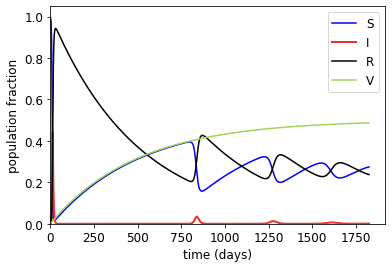

In [5]:
colors = {
    'S':'blue',
    'I':'#F13030',
    'R':'black', 
    'V':'#9FD356'}

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
S,I,R,V = results
ax.plot(t,S,label='S',color=colors['S'])
ax.plot(t,I,label='I',color=colors['I'],linewidth=2)
ax.plot(t,R,label='R',color=colors['R'])
ax.plot(t,V,label='V',color=colors['V'])
# 
# Make the plot attractive
ax.legend(loc='best')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('time (days)')
ax.set_ylabel('population fraction')